**IMPORT LIBRARIES**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

**LOADING DATA**

In [16]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tcs_share.csv')
data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [17]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.dropna()

**SPLITTING DATA INTO TRAINING AND TESTING SET**

In [18]:
train_size = 0.8 # 80%
split_index = int(train_size * data.shape[0])
factors_column = ['Open', 'High', 'Low', 'Close', 'Volume']
y_col_index = 3 # Close
train_set = data[factors_column].values[:split_index]
test_set = data[factors_column].values[split_index:]

**SCALING DATA**

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
test_set_scaled = sc.fit_transform(test_set)

**GENERAT WINDOWED TIMESTAMP DATA**

In [25]:
import numpy as np
def generate_data(series, y_col_index, time_window=70):
  X = []
  y = []
  for i in range(70, len(series)):
    X.append(series[i-time_window: i])
    y.append(series[i, y_col_index])
  return (np.array(X), np.array(y))

In [26]:
X_train, y_train = generate_data(train_set_scaled,
y_col_index=y_col_index)
X_test, y_test = generate_data(test_set_scaled,
y_col_index=y_col_index)

**IMPORTING REQUIRED LIBRARIES**

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [28]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape =
X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(LSTM(units = 20, return_sequences = True))
model.add(Dropout(0.2))
# model.add(LSTM(units = 10, return_sequences = True))
model.add(LSTM(units = 10))
model.add(Dropout(0.2))
# model.add(LSTM(units = 10))
# model.add(Dropout(0.2))
model.add(Dense(units = 1))

**COMPILING & TRAINING LSTM NETWORK**

In [10]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
55/55 [==============================] - 11s 97ms/step - loss: 0.0268
Epoch 2/100
55/55 [==============================] - 5s 95ms/step - loss: 0.0082
Epoch 3/100
55/55 [==============================] - 5s 93ms/step - loss: 0.0072
Epoch 4/100
55/55 [==============================] - 5s 92ms/step - loss: 0.0067
Epoch 5/100
55/55 [==============================] - 5s 94ms/step - loss: 0.0066
Epoch 6/100
55/55 [==============================] - 5s 93ms/step - loss: 0.0060
Epoch 7/100
55/55 [==============================] - 5s 93ms/step - loss: 0.0058
Epoch 8/100
55/55 [==============================] - 5s 93ms/step - loss: 0.0050
Epoch 9/100
55/55 [==============================] - 5s 93ms/step - loss: 0.0052
Epoch 10/100
55/55 [==============================] - 5s 93ms/step - loss: 0.0047
Epoch 11/100
55/55 [==============================] - 5s 93ms/step - loss: 0.0041
Epoch 12/100
55/55 [==============================] - 5s 94ms/step - loss: 0.0043
Epoch 13/100
55/55 [====

**TESTING TRAINED LSTM NETWORK**

In [11]:
test_prediction = model.predict(X_test)
test_prediction = (test_prediction * sc.data_range_[y_col_index]) + sc.data_min_[y_col_index]

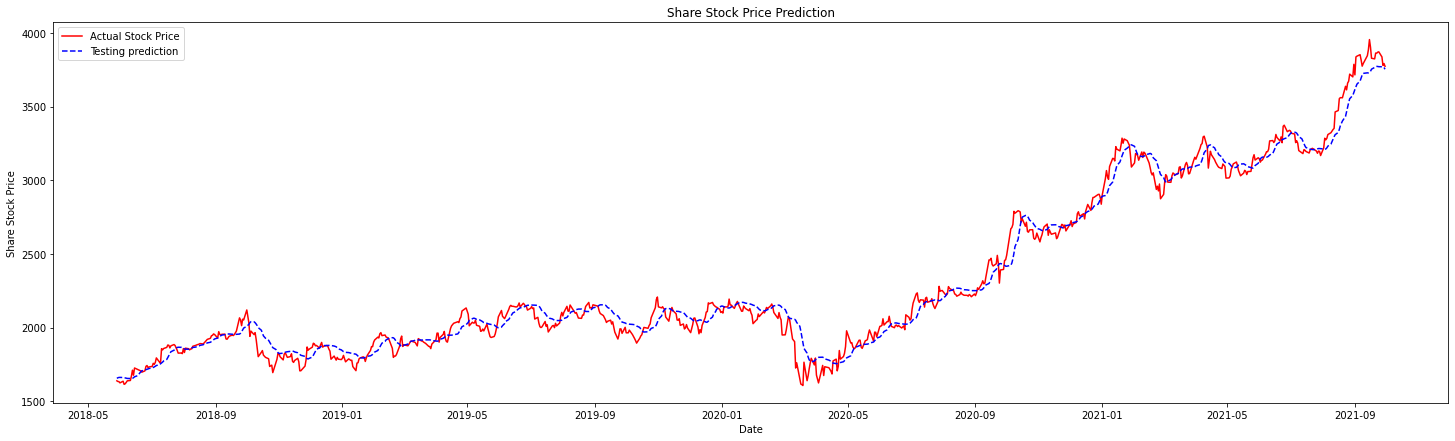

In [12]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date.values[ split_index+70 : ], data.Close.values[split_index+70: ], 'r-', label = 'Actual Stock Price')
plt.plot(data['Date'].values[split_index+70 : ], test_prediction, 'b--', label = 'Testing prediction')
plt.title('Share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Share Stock Price')
plt.legend()
plt.show()

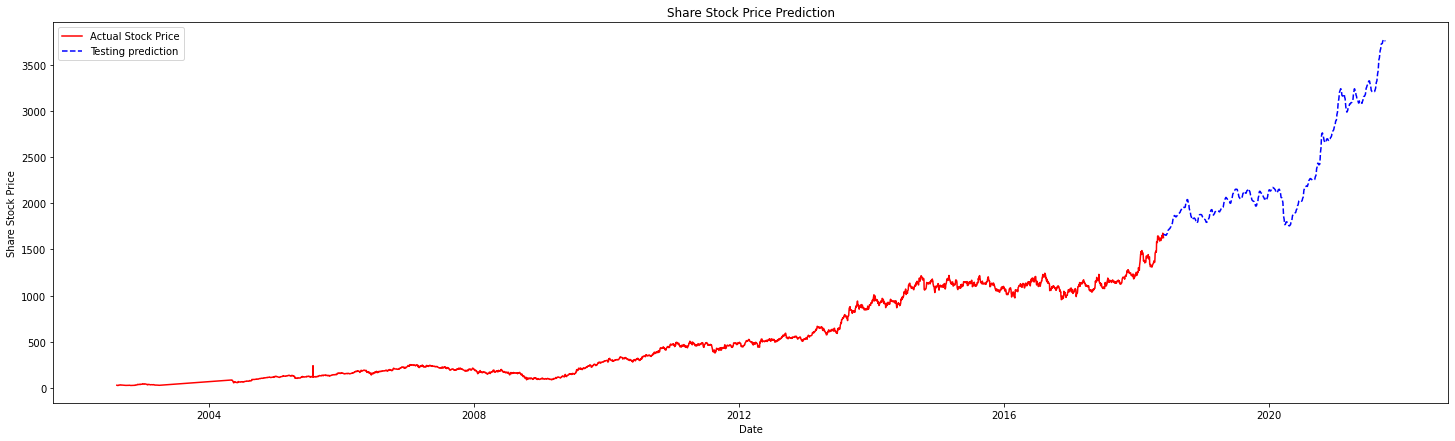

In [13]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date.values[ : split_index+70 ], data.Close.values[:split_index+70 ], 'r-', label = 'Actual Stock Price')
plt.plot(data['Date'].values[split_index+70 : ], test_prediction, 'b--', label = 'Testing prediction')
plt.title('Share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Share Stock Price')
plt.legend()
plt.show()

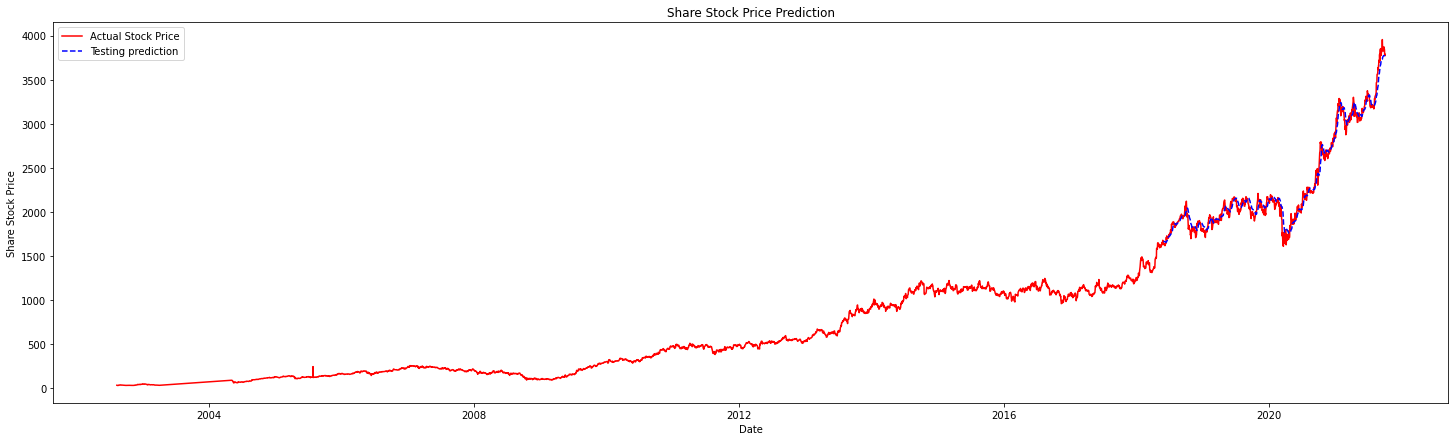

In [14]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date, data.Close, 'r-', label = 'Actual Stock Price')
plt.plot(data['Date'].values[split_index+70 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('Share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Share Stock Price')
plt.legend()
plt.show()